<a href="https://colab.research.google.com/github/thspanos/AI-LAb/blob/main/Thomas_Spanos_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#εγκατάσταση πακέτου PyOD (https://pyod.readthedocs.io/en/latest/)
!pip install pyod

In [13]:
#εισαγωγή βιβλιοθηκών - πακέτων
import pandas as pd
from sklearn.preprocessing import StandardScaler
from pyod.models.ecod import ECOD
import matplotlib.pyplot as plt

In [14]:
#εισαγωγή του συνόλου δεδομένων
network_data = pd.read_csv('https://raw.githubusercontent.com/thspanos/AI-LAb/refs/heads/main/Data/network_traffic_data.csv', delimiter=',')

In [15]:
#εξαγωγή χαρακτηριστικών (ανεξάρτητων μεταβλητών) για την αναγνώριση ανωμαλιών
features = ['src_port', 'dest_port', 'packet_size', 'num_packets',
            'flow_duration', 'bytes_transferred', 'packet_rate']

X = network_data[features].values

In [16]:
#κλιμάκωση δεδομένων
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
#χρήση αλγορίθμου ECOD
model = ECOD(contamination=0.02)
model.fit(X_scaled)

ECOD(contamination=0.02, n_jobs=1)

In [18]:
#πρόβλεψη βαθμού ανωμαλίας (anomaly score)
anomaly_scores = model.decision_function(X_scaled)

In [19]:
#προσθήκη βαθμού ανωμαλίας (anomaly score) στο σύνολο δεδομένων
network_data['anomaly_score'] = anomaly_scores

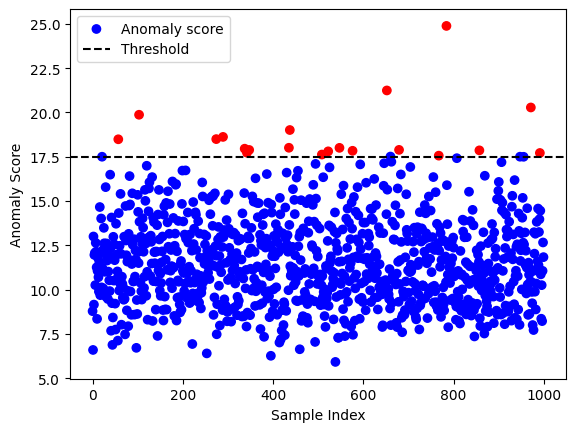

In [20]:

#οπτικοποίηση αποτελεσμάτων, με μπλε οι τιμές που θεωρούνται κανονικές και με κόκκινο όσες καταγράφονται ως ανωμαλίες
colors = ['blue' if score <= model.threshold_ else 'red' for score in anomaly_scores]

plt.scatter(network_data.index, anomaly_scores, c=colors, label='Anomaly score')
plt.axhline(y=model.threshold_, color='black', linestyle='--', label='Threshold')
plt.xlabel('Sample Index')
plt.ylabel('Anomaly Score')
plt.legend()

In [21]:
#τύπωση των τιμών που εντοπίσθηκαν ως ανωμαλίες
anomalies = network_data[network_data['anomaly_score'] > model.threshold_]
print("Detected Anomalies:")
print(anomalies)

Detected Anomalies:
              src_ip          dest_ip  ...            timestamp  anomaly_score
57      14.119.240.3    156.201.16.65  ...  2023-01-01 00:57:00      18.486889
103    89.145.197.36    18.163.186.62  ...  2023-01-01 01:43:00      19.870059
274  124.101.237.131     42.206.11.39  ...  2023-01-01 04:34:00      18.497076
289   153.152.11.132   211.36.233.208  ...  2023-01-01 04:49:00      18.620630
337    96.163.130.72  159.186.229.190  ...  2023-01-01 05:37:00      17.956060
342    148.7.229.199    199.246.71.61  ...  2023-01-01 05:42:00      17.731245
347    97.214.29.115    189.51.88.126  ...  2023-01-01 05:47:00      17.884748
435    248.86.42.128    29.10.219.107  ...  2023-01-01 07:15:00      18.007958
437   151.16.132.147  122.199.190.191  ...  2023-01-01 07:17:00      19.009205
508     108.75.29.57  205.233.248.237  ...  2023-01-01 08:28:00      17.626095
522   204.106.112.93   76.131.230.245  ...  2023-01-01 08:42:00      17.806499
547  247.202.147.215   230.242.1